# **Import the libraries**

In [ ]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, random, cv2
warnings.filterwarnings('ignore')
import tensorflow as tf
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

In [ ]:
train_dir = "/content/drive/MyDrive/facial emotion recognition/train/train/"
test_dir = "/content/drive/MyDrive/facial emotion recognition/test/test/"

In [ ]:
import os

In [ ]:
def import_images(directory):
    image_paths = []
    labels = []

    for category in os.listdir(directory):
        for filename in os.listdir(directory+category):
            image_path = os.path.join(directory,category,filename)
            image_paths.append(image_path)
            labels.append(category)

    return image_paths, labels

In [ ]:
import pandas as pd

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = import_images(train_dir)
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,image,label
0,/content/drive/MyDrive/facial emotion recognit...,happy
1,/content/drive/MyDrive/facial emotion recognit...,fear
2,/content/drive/MyDrive/facial emotion recognit...,fear
3,/content/drive/MyDrive/facial emotion recognit...,angry
4,/content/drive/MyDrive/facial emotion recognit...,angry


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = import_images(test_dir)
test.head()

,image,label
0,/content/drive/MyDrive/facial emotion recognit...,angry
1,/content/drive/MyDrive/facial emotion recognit...,angry
2,/content/drive/MyDrive/facial emotion recognit...,angry
3,/content/drive/MyDrive/facial emotion recognit...,angry
4,/content/drive/MyDrive/facial emotion recognit...,angry


# Exploratory Data Analysis

In [ ]:
import seaborn as sns

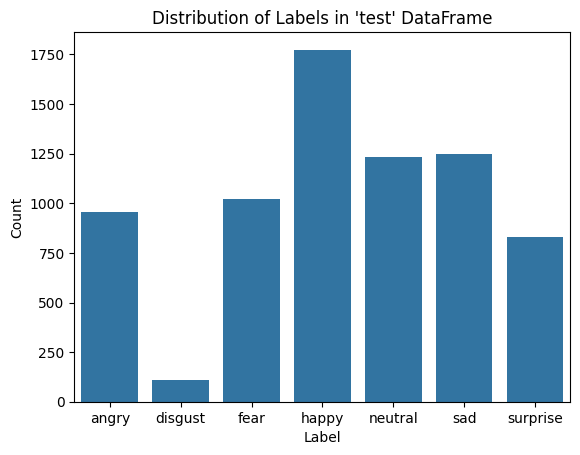

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame named 'test'
sns.countplot(x="label", data=test)  # Switch 'x' and 'y' for count on x-axis

# Customize the plot (optional)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in 'test' DataFrame")
plt.show()


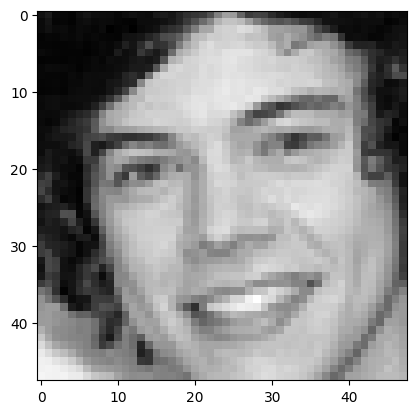

In [ ]:
img = Image.open(train['image'][0])
plt.imshow(img,cmap='gray');

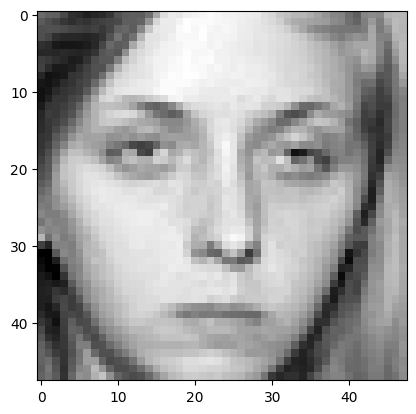

In [ ]:
img = Image.open(train['image'][232])
plt.imshow(img,cmap='gray');

In [ ]:
import numpy as np


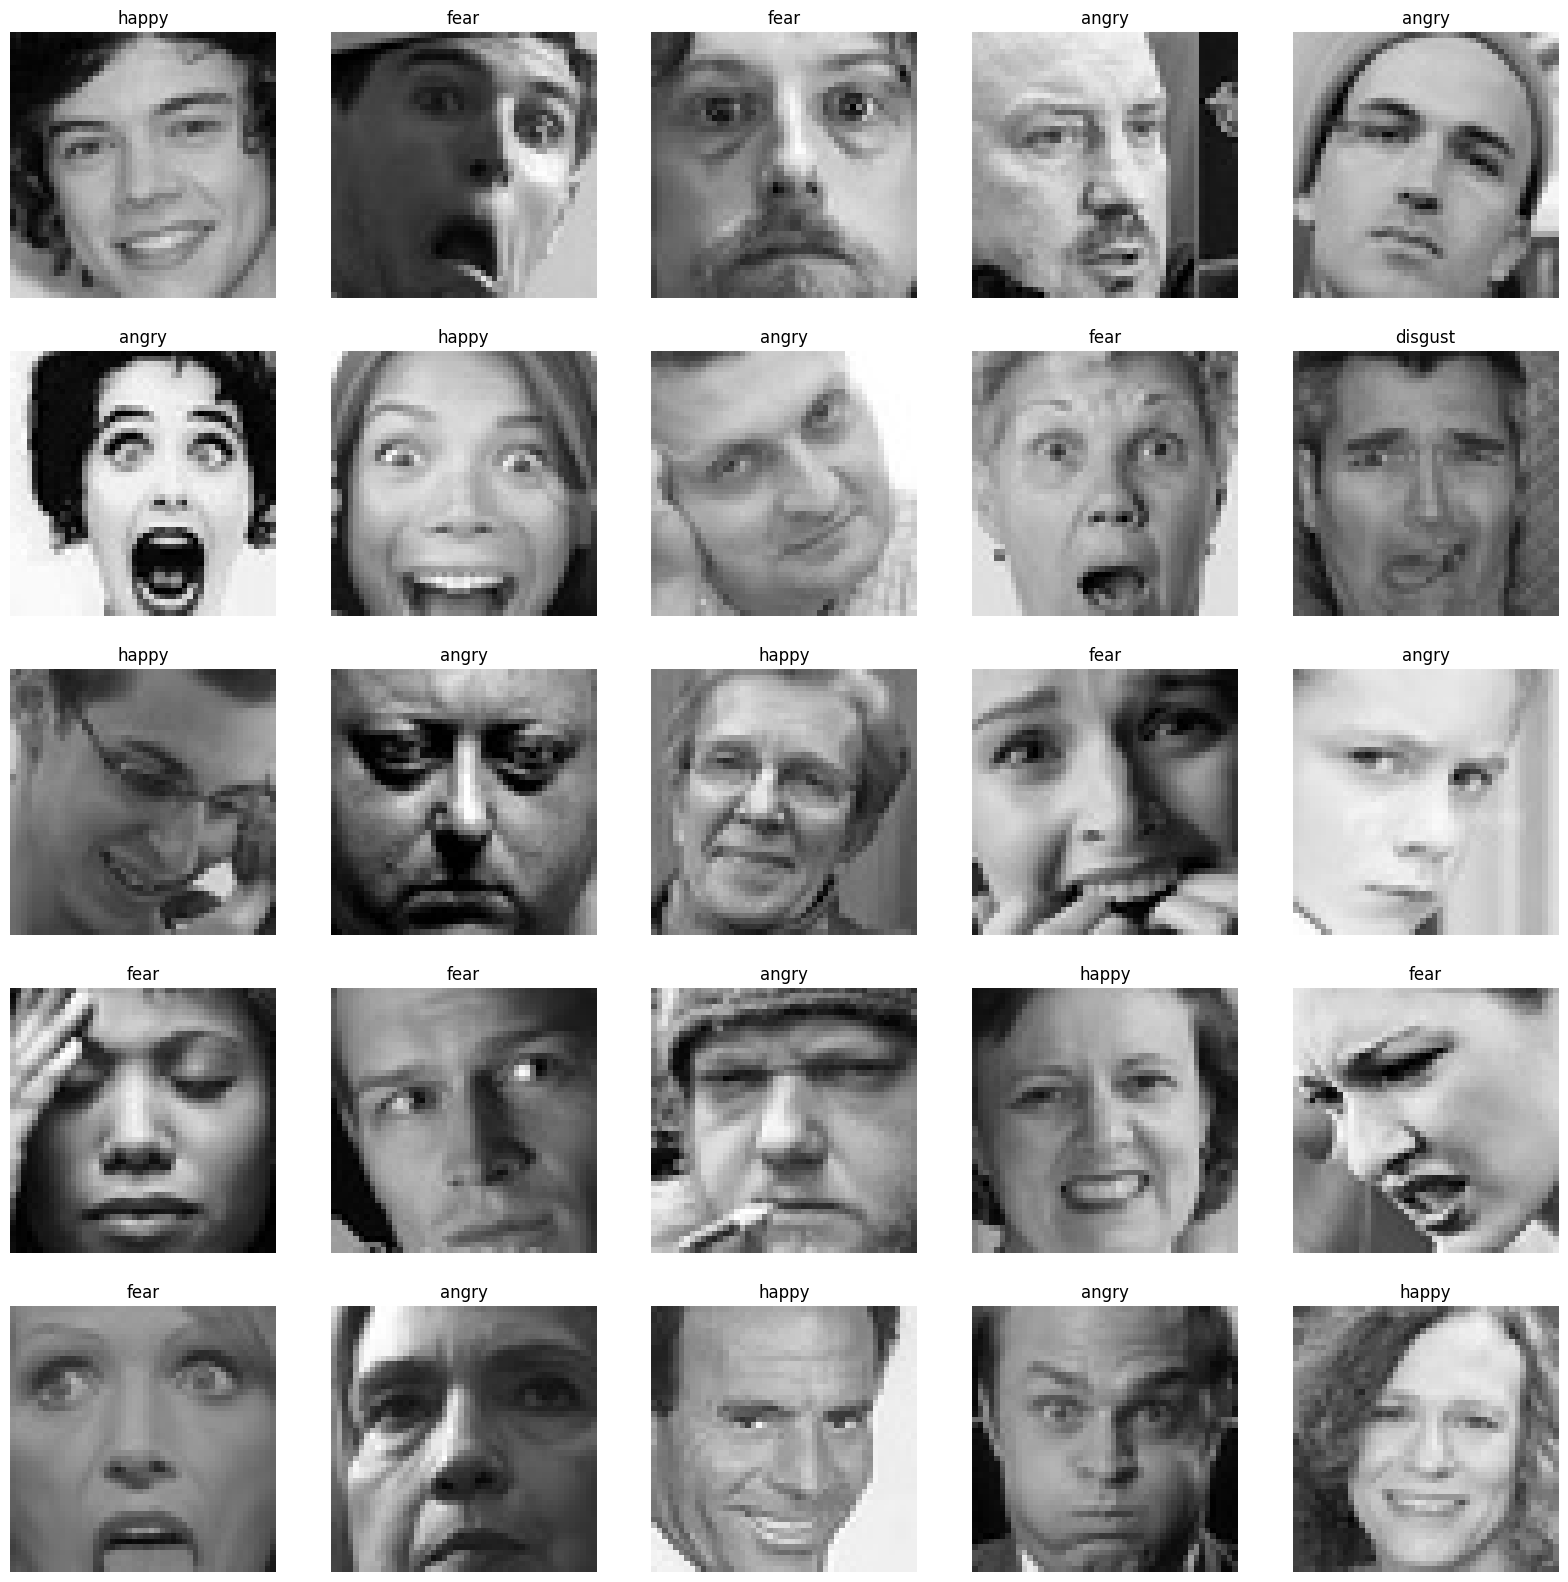

In [ ]:
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for idx, file, label in files.itertuples():
    plt.subplot(5,5,idx+1)
    image = load_img(file)
    image = np.array(image)
    plt.imshow(image,cmap='gray')
    plt.title(label)
    plt.axis('off')

Feature extraction

# Data Preprocessing

In [ ]:
def extract_features(images):
    features = []

    for file in tqdm(images):
        img = Image.open(file,grayscale=True)
        img = np.array(img)
        features.append(img)

    features = np.array(features).reshape(len(features),48,48,1)
    return features

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
from PIL import Image
def extract_features(images):

    features = []

    for file in tqdm(images):
        img = Image.open(file).convert('L')
        img = np.array(img)
        features.append(img)

    return features

In [ ]:
feat_train = extract_features(train['image'])
feat_test = extract_features(test['image'])

100%|██████████| 7178/7178 [26:43<00:00,  4.48it/s]


In [ ]:
print(type(feat_train))
print(type(feat_test))

<class 'list'>
<class 'list'>


Normalize th images

In [ ]:
X_train = np.array(feat_train)
X_test = np.array(feat_test)
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
test_arr = np.array(test)
train_arr = np.array(train)

In [ ]:
test_labels = test_arr[:, 1]
train_labels = train_arr[:, 1]

convert labels into integers

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
import numpy as np

# Define the unique_labels variable
unique_labels = np.array(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])

le = LabelEncoder()
le.fit(unique_labels)
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

# Model Architecture

In [ ]:
cnn = Sequential()

# 1st Convolutional Layer
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

# 2nd Convolutional Layer
cnn.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

# 3rd Convolutional Layer
cnn.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

# 4th Convolutional Layer
cnn.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.32))

# Flatten
cnn.add(Flatten())

# 1st Fully-Connected Layer
cnn.add(Dense(units=512,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

# 2nd Fully-Connected Layer
cnn.add(Dense(units=512,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

# Output Layer
cnn.add(Dense(units=7,activation='softmax'))

In [ ]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0

In [ ]:
r = cnn.fit(x=X_train,y=y_train,batch_size=128,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
77/77 [==============================] - 661s 8s/step - loss: 2.0352 - accuracy: 0.2983 - val_loss: 2.1516 - val_accuracy: 0.1342
Epoch 2/50
77/77 [==============================] - 622s 8s/step - loss: 1.3823 - accuracy: 0.4471 - val_loss: 3.3185 - val_accuracy: 0.1427
Epoch 3/50
77/77 [==============================] - 629s 8s/step - loss: 1.1518 - accuracy: 0.5165 - val_loss: 3.9600 - val_accuracy: 0.1336
Epoch 4/50
77/77 [==============================] - 612s 8s/step - loss: 1.0438 - accuracy: 0.5631 - val_loss: 4.5326 - val_accuracy: 0.1336
Epoch 5/50
77/77 [==============================] - 627s 8s/step - loss: 0.9603 - accuracy: 0.6003 - val_loss: 3.9413 - val_accuracy: 0.1362
Epoch 6/50
77/77 [==============================] - 636s 8s/step - loss: 0.8801 - accuracy: 0.6289 - val_loss: 3.7947 - val_accuracy: 0.2696
Epoch 7/50
77/77 [==============================] - 641s 8s/step - loss: 0.7983 - accuracy: 0.6642 - val_loss: 4.3323 - val_accuracy: 0.1884
Epoch 8/50
77

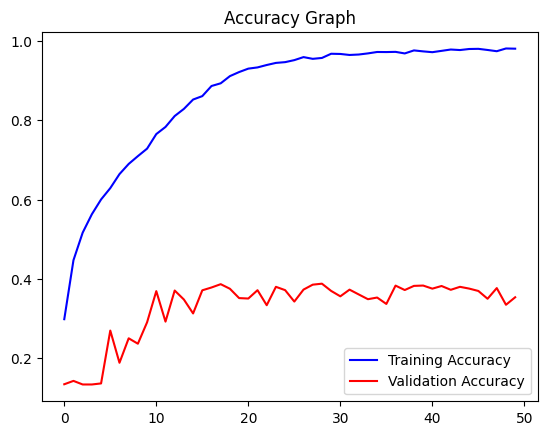

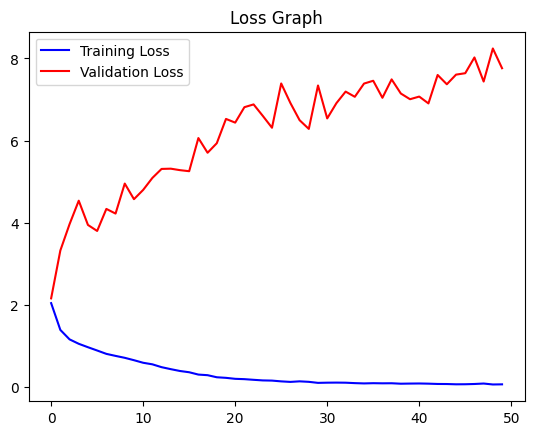

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = r.history['loss']
val_loss = r.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

# Prediction

Original Label: neutral
1/1 [==============================] - 0s 344ms/step
Predicted Label: angry


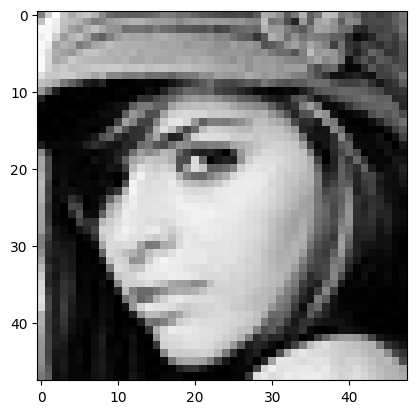

In [ ]:
img_idx = random.randint(0,len(test))
print("Original Label:", test['label'][img_idx])
pred = cnn.predict(X_test[img_idx].reshape(1,48,48,1))
predicted_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Label:", predicted_label)
plt.imshow(X_test[img_idx].reshape(48,48),cmap='gray');

True Output:  fear
1/1 [==============================] - 0s 74ms/step
Predicted Output: fear


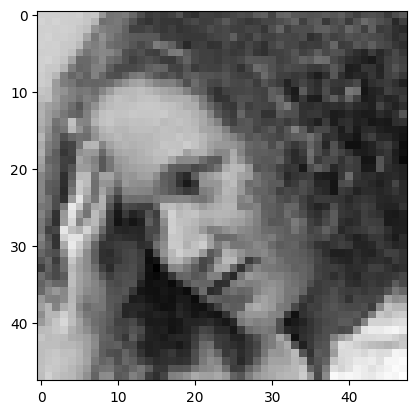

In [ ]:
img_idx = random.randint(0,len(test))
print("True Output: ",test['label'][img_idx])
pred = cnn.predict(X_test[img_idx].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(X_test[img_idx].reshape(48, 48), cmap='gray')

True Output:  surprise
1/1 [==============================] - 0s 36ms/step
Predicted Output: fear


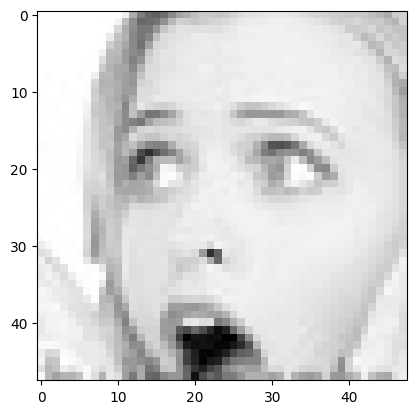

In [ ]:
import random
img_idx = random.randint(0,len(test))
print("True Output: ",test['label'][img_idx])
pred = cnn.predict(X_test[img_idx].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(X_test[img_idx].reshape(48, 48), cmap='gray');

True Output:  happy
1/1 [==============================] - 0s 37ms/step
Predicted Output: happy


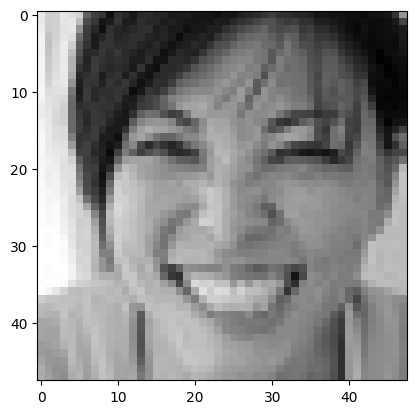

In [ ]:
img_idx = random.randint(0,len(test))
print("True Output: ",test['label'][img_idx])
pred = cnn.predict(X_test[img_idx].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(X_test[img_idx].reshape(48, 48), cmap='gray');

True Output:  neutral
1/1 [==============================] - 0s 38ms/step
Predicted Output: disgust


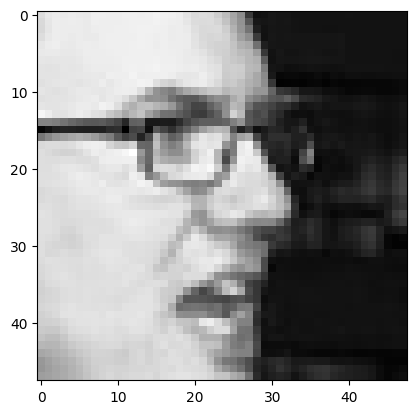

In [ ]:
import random
img_idx = random.randint(0,len(test))
print("True Output: ",test['label'][img_idx])
pred = cnn.predict(X_test[img_idx].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(X_test[img_idx].reshape(48, 48), cmap='gray');

Done by:Nazuk Sathvara